Introduction
============

This is interactive notebook regarding "Introduction to path planning". (Author: Björn Hein)

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This notebook imports all discussed algorithms and does a comparison

**Attention**: This worksheet has external dependencies 

* to the files "InnoKonz2dEnv.py" or "InnoKonzShapelyEnv.py". These files contain simple 2D environments based on numpy arrays or the shapely library with an interface for the use as collision checking in the algorithms.
* to all modules like "**Algorithm**.py", which contains the corresponding algorithms 

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

Änderungen BasicPRM

- Automated Planner Test:
  - IPBasicPRM_Roundtrip eingefügt
  - Eigene Methode für Planer erstellt
  - PlanRoundPath bei Visualisierung eingefügt
- IPBasicPRM_Roundtrip
  - erstellt aus IPBasicPRM
  - "Break" in "Continue" geändert bei "_learnRoadmapNearestNeighbour"
  - Funktion "PlanRoundPath" aus "PlanPath" erstellt
  - "InterimGoal" entsprechend "Start" und "Goal" eingefügt
  - InterimGoal in Lösungspfad eingebaut
- IPBenchmark
  - "InterimGoalList" eingefügt
- IPPlanerBase
  - "InterimGoalList" eingefügt
- IPTestSuite
  - Koordinate von InterimGoal hinzugefügt
- IPVISBasicPRM
  - Darstellung von Interim hinzugefügt

Adding all planners
===========


In [1]:
import sys
import HelperClass
sys.path.append("templates")
%load_ext autoreload
%autoreload 2

In [2]:
from IPPerfMonitor import IPPerfMonitor

import IPVISBasicPRM
import IPBasicPRM_Roundtrip

import IPVisibilityPRM_Roundtrip
import IPVISVisibilityPRM

import IPLazyPRM_Roundtrip
import IPVISLazyPRM


Set-up of the test scenario and the configuration for all planner
===================================

Following a procedure to compare all discussed planners are shown:

1. Configuration for every planner is defined
2. The configuration and the planner is stored in the variable setup, a Python dict()
3. the variable setup is then used to uniformly call the planning calls


In [3]:
plannerFactory = dict()

# basicConfig = dict()
# basicConfig["radius"] = 3
# basicConfig["numNodes"] = 200
# plannerFactory["basePRM"] = [IPBasicPRM_Roundtrip.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]

visbilityConfig = dict()
visbilityConfig["ntry"] = 300
plannerFactory["visibilityPRM"] = [IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]
plannerFactory

# lazyConfig = dict()
# lazyConfig["initialRoadmapSize"] = 50
# lazyConfig["updateRoadmapSize"]  = 2
# lazyConfig["kNearest"] = 10
# plannerFactory["lazyPRM"] = [IPLazyPRM_Roundtrip.LazyPRM, lazyConfig, IPVISLazyPRM.lazyPRMVisualize]

{'visibilityPRM': [IPVisibilityPRM_Roundtrip.VisPRM,
  {'ntry': 300},
  <function IPVISVisibilityPRM.visibilityPRMVisualize(planner, solution, ax=None, nodeSize=300)>]}

In [4]:
class ResultCollection (object):
    
    def __init__(self, plannerFactoryName, planner, benchmark, solution, perfDataFrame):
        self.plannerFactoryName = plannerFactoryName
        self.planner = planner
        self.benchmark = benchmark
        self.solution = solution
        self.perfDataFrame = perfDataFrame

In [5]:
import IPTestSuite
import importlib

In [6]:
importlib.reload(IPTestSuite)

<module 'IPTestSuite' from '/home/maurice/Dokumente/Projekt_Roboterprogrammierung/08_01_24_aktuellerStand/RKIM23RobotProgramDS/02_eigeneNotebooks/IPTestSuite.py'>

In [7]:
fullBenchList = IPTestSuite.benchList

for benchmark in fullBenchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
B_rush
circle od death


In [8]:
resultList = list()
testList = fullBenchList[:5]

for key,producer in list(plannerFactory.items()):
    HelperClass.HelperClass.printInColor(str(key)+" "+ str(producer), 'yellow')
    #print(key, producer)
    for benchmark in testList:
        HelperClass.HelperClass.printInColor("Planning: " + key + " - " + benchmark.name, 'yellow')
        #planner = IPBasicPRM.BasicPRM(benchmark.collisionChecker)
        planner = producer[0](benchmark.collisionChecker)
        IPPerfMonitor.clearData()
        

        try:
            resultList.append(ResultCollection(key,
                                        planner, 
                                        benchmark, 
                                        planner.planRoundPath(benchmark.startList,benchmark.interimGoalList,benchmark.goalList,producer[1]),
                                        IPPerfMonitor.dataFrame()),)
            #a = planner.planPath(benchmark.startList,benchmark.goalList,producer[1])
            # print("")


        except Exception as e:
            HelperClass.HelperClass.printInColor("PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR", 'red')
            HelperClass.HelperClass.printInColor(e, 'red')
            pass

        

Ziel Interim:[[3, 10], 7.810249675906654, 'interim0']
Try Path: ['start', 1, 14, 0, 7, 'interim0']

While Schleife beginnt
TRYPATH : ['start', 1, 14, 0, 7, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  start


Nächstes Ziel-Interim:  [[3, 10], 7.810249675906654, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  1


Nächstes Ziel-Interim:  [[20, 15], 6.075146450928981, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [14, 0, 7, 4, 11, 9, 'interim3']

While Schleife beginnt
TRYPATH : [14, 0, 7, 4, 11, 9, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  14


Nächstes Ziel-Interim:  [[3, 10], 11.394594141645312, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [0, 7, 'interim0']

While Schleife beginnt
TRYPATH : [0, 7, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  0


Nächstes Ziel-Interim:  [[3, 10], 8.13809432542617, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [7, 'interim0']

While Schleife beginnt
TRYPATH : [7, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  7


Nächstes Ziel-Interim:  [[3, 3], 1.594541599636735, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim2']

While Schleife beginnt
TRYPATH : ['interim2']

For-Schleife beginnt
Aktueller Node (step):  interim2


Nächstes Ziel-Interim:  [[3, 3], 0.0, 'interim2']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[3, 10], 7.0, 'interim0']
Neuer Trypath:  [7, 'interim0']

While Schleife beginnt
TRYPATH : [7, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  7


Nächstes Ziel-Interim:  [[10, 1], 5.76673492814154, 'interim4']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [4, 'interim4']

While Schleife beginnt
TRYPATH : [4, 'interim4']

For-Schleife beginnt
Aktueller Node (step):  4


Nächstes Ziel-Interim:  [[10, 1], 4.3642346986668095, 'interim4']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim4']

While Schleife beginnt
TRYPATH : ['interim4']

For-Schleife beginnt
Aktueller Node (step):  interim4


Nächstes Ziel-Interim:  [[10, 1], 0.0, 'interim4']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[3, 10], 11.40175425099138, 'interim0']
Neuer Trypath:  [4, 7, 'interim0']

While Schleife beginnt
TRYPATH : [4, 7, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  4


Nächstes Ziel-Interim:  [[3, 10], 7.282526103586289, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [7, 'interim0']

While Schleife beginnt
TRYPATH : [7, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  7


Nächstes Ziel-Interim:  [[3, 10], 7.965089062509106, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim0']

While Schleife beginnt
TRYPATH : ['interim0']

For-Schleife beginnt
Aktueller Node (step):  interim0


Nächstes Ziel-Interim:  [[3, 10], 0.0, 'interim0']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[20, 15], 17.72004514666935, 'interim3']
Neuer Trypath:  [7, 4, 11, 9, 'interim3']

While Schleife beginnt
TRYPATH : [7, 4, 11, 9, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  7


Nächstes Ziel-Interim:  [[22, 8], 18.595081881292238, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [4, 11, 9, 'interim1']

While Schleife beginnt
TRYPATH : [4, 11, 9, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  4


Nächstes Ziel-Interim:  [[22, 8], 13.99729124896441, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [11, 9, 'interim1']

While Schleife beginnt
TRYPATH : [11, 9, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  11


Nächstes Ziel-Interim:  [[22, 8], 9.913670631512053, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [9, 'interim1']

While Schleife beginnt
TRYPATH : [9, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  9


Nächstes Ziel-Interim:  [[20, 15], 2.956403482242625, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim3']

While Schleife beginnt
TRYPATH : ['interim3']

For-Schleife beginnt
Aktueller Node (step):  interim3


Nächstes Ziel-Interim:  [[20, 15], 0.0, 'interim3']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[22, 8], 7.280109889280518, 'interim1']
Neuer Trypath:  [9, 'interim1']

While Schleife beginnt
TRYPATH : [9, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  9


Nächstes Ziel-Interim:  [[22, 8], 4.770437175884433, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim1']

While Schleife beginnt
TRYPATH : ['interim1']

For-Schleife beginnt
Aktueller Node (step):  interim1


Nächstes Ziel-Interim:  [[22, 8], 0.0, 'interim1']
Ziel-Interim erreicht


Ziel Interim:[[4, 4], 11.0, 'interim2']
Try Path: ['start', 5, 216, 'interim2']

While Schleife beginnt
TRYPATH : ['start', 5, 216, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  start


Nächstes Ziel-Interim:  [[4, 4], 11.0, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  5


Nächstes Ziel-Interim:  [[18, 16], 14.357725882460478, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim1']

While Schleife beginnt
TRYPATH : ['interim1']

For-Schleife beginnt
Aktueller Node (step):  interim1


Nächstes Ziel-Interim:  [[18, 16], 0.0, 'interim1']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[18, 3], 13.0, 'interim0']
Neuer Trypath:  [5, 216, 'interim0']

While Schleife beginnt
TRYPATH : [5, 216, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  5


Nächstes Ziel-Interim:  [[4, 4], 14.656744014265406, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [216, 'interim2']

While Schleife beginnt
TRYPATH : [216, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  216


Nächstes Ziel-Interim:  [[18, 3], 8.154276112360687, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim0']

While Schleife beginnt
TRYPATH : ['interim0']

For-Schleife beginnt
Aktueller Node (step):  interim0


Nächstes Ziel-Interim:  [[18, 3], 0.0, 'interim0']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[18, 1], 2.0, 'interim3']
Neuer Trypath:  [216, 'interim3']

While Schleife beginnt
TRYPATH : [216, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  216


Nächstes Ziel-Interim:  [[18, 1], 10.069592183282246, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim3']

While Schleife beginnt
TRYPATH : ['interim3']

For-Schleife beginnt
Aktueller Node (step):  interim3


Nächstes Ziel-Interim:  [[18, 1], 0.0, 'interim3']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[4, 4], 14.317821063276353, 'interim2']
Neuer Trypath:  [216, 'interim2']

While Schleife beginnt
TRYPATH : [216, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  216


Nächstes Ziel-Interim:  [[4, 4], 13.22983312680055, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim2']

While Schleife beginnt
TRYPATH : ['interim2']

For-Schleife beginnt
Aktueller Node (step):  interim2


Nächstes Ziel-Interim:  [[4, 4], 0.0, 'interim2']
Ziel-Interim erreicht


Ziel Interim:[[18, 16], 14.866068747318506, 'interim2']
Try Path: ['start', 1, 108, 'interim2']

While Schleife beginnt
TRYPATH : ['start', 1, 108, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  start


Nächstes Ziel-Interim:  [[18, 16], 14.866068747318506, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  1


Nächstes Ziel-Interim:  [[18, 16], 13.649782988048118, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [108, 'interim2']

While Schleife beginnt
TRYPATH : [108, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  108


Nächstes Ziel-Interim:  [[18, 16], 6.143355007785004, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim2']

While Schleife beginnt
TRYPATH : ['interim2']

For-Schleife beginnt
Aktueller Node (step):  interim2


Nächstes Ziel-Interim:  [[18, 16], 0.0, 'interim2']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[18, 4], 12.0, 'interim0']
Neuer Trypath:  [108, 80, 85, 'interim0']

While Schleife beginnt
TRYPATH : [108, 80, 85, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  108


Nächstes Ziel-Interim:  [[18, 4], 15.564829926868645, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [80, 85, 'interim0']

While Schleife beginnt
TRYPATH : [80, 85, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  80


Nächstes Ziel-Interim:  [[18, 4], 8.047362930069527, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [85, 'interim0']

While Schleife beginnt
TRYPATH : [85, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  85


Nächstes Ziel-Interim:  [[4, 4], 6.75655350926965, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [0, 'interim1']

While Schleife beginnt
TRYPATH : [0, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  0


Nächstes Ziel-Interim:  [[4, 4], 2.421198974934503, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim1']

While Schleife beginnt
TRYPATH : ['interim1']

For-Schleife beginnt
Aktueller Node (step):  interim1


Nächstes Ziel-Interim:  [[4, 4], 0.0, 'interim1']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[18, 4], 14.0, 'interim0']
Neuer Trypath:  [0, 85, 'interim0']

While Schleife beginnt
TRYPATH : [0, 85, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  0


Nächstes Ziel-Interim:  [[18, 4], 11.604598758243577, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [85, 'interim0']

While Schleife beginnt
TRYPATH : [85, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  85


Nächstes Ziel-Interim:  [[18, 1], 7.961458381234295, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim3']

While Schleife beginnt
TRYPATH : ['interim3']

For-Schleife beginnt
Aktueller Node (step):  interim3


Nächstes Ziel-Interim:  [[18, 1], 0.0, 'interim3']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[18, 4], 3.0, 'interim0']
Neuer Trypath:  [85, 'interim0']

While Schleife beginnt
TRYPATH : [85, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  85


Nächstes Ziel-Interim:  [[18, 4], 8.518812819247772, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim0']

While Schleife beginnt
TRYPATH : ['interim0']

For-Schleife beginnt
Aktueller Node (step):  interim0


Nächstes Ziel-Interim:  [[18, 4], 0.0, 'interim0']
Ziel-Interim erreicht


Ziel Interim:[[10, 10], 11.84440796325422, 'interim0']
Try Path: ['start', 9, 10, 'interim0']

While Schleife beginnt
TRYPATH : ['start', 9, 10, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  start


Nächstes Ziel-Interim:  [[10, 10], 11.84440796325422, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  9


Nächstes Ziel-Interim:  [[10, 10], 11.76409584962054, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [10, 'interim0']

While Schleife beginnt
TRYPATH : [10, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  10


Nächstes Ziel-Interim:  [[10, 10], 1.1174624863920013, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim0']

While Schleife beginnt
TRYPATH : ['interim0']

For-Schleife beginnt
Aktueller Node (step):  interim0


Nächstes Ziel-Interim:  [[10, 10], 0.0, 'interim0']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[17.25, 10], 7.25, 'interim3']
Neuer Trypath:  [10, 7, 14, 0, 33, 29, 49, 'interim3']

While Schleife beginnt
TRYPATH : [10, 7, 14, 0, 33, 29, 49, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  10


Nächstes Ziel-Interim:  [[17.25, 10], 7.949523738780472, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [7, 14, 0, 33, 29, 49, 'interim3']

While Schleife beginnt
TRYPATH : [7, 14, 0, 33, 29, 49, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  7


Nächstes Ziel-Interim:  [[17.25, 10], 5.385844860958927, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [14, 0, 33, 29, 49, 'interim3']

While Schleife beginnt
TRYPATH : [14, 0, 33, 29, 49, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  14


Nächstes Ziel-Interim:  [[15, 2], 15.495110838966063, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [0, 33, 29, 49, 11, 41, 1, 50, 'interim1']

While Schleife beginnt
TRYPATH : [0, 33, 29, 49, 11, 41, 1, 50, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  0


Nächstes Ziel-Interim:  [[20, 18], 7.3523458070642445, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [16, 4, 'interim2']

While Schleife beginnt
TRYPATH : [16, 4, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  16


Nächstes Ziel-Interim:  [[17.25, 10], 6.36759495433609, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [0, 33, 29, 49, 'interim3']

LOOP VERHINDERT
Neuer Trypath:  [4, 'interim2']

While Schleife beginnt
TRYPATH : [4, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  4


Nächstes Ziel-Interim:  [[20, 18], 2.114004070761699, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim2']

While Schleife beginnt
TRYPATH : ['interim2']

For-Schleife beginnt
Aktueller Node (step):  interim2


Nächstes Ziel-Interim:  [[20, 18], 0.0, 'interim2']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[17.25, 10], 8.459462157844316, 'interim3']
Neuer Trypath:  [4, 16, 0, 33, 29, 49, 'interim3']

While Schleife beginnt
TRYPATH : [4, 16, 0, 33, 29, 49, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  4


Nächstes Ziel-Interim:  [[17.25, 10], 10.06695985905065, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [16, 0, 33, 29, 49, 'interim3']

While Schleife beginnt
TRYPATH : [16, 0, 33, 29, 49, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  16


Nächstes Ziel-Interim:  [[17.25, 10], 6.36759495433609, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [0, 33, 29, 49, 'interim3']

While Schleife beginnt
TRYPATH : [0, 33, 29, 49, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  0


Nächstes Ziel-Interim:  [[17.25, 10], 11.712251625000109, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [33, 29, 49, 'interim3']

While Schleife beginnt
TRYPATH : [33, 29, 49, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  33


Nächstes Ziel-Interim:  [[17.25, 10], 15.761245152857237, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [29, 49, 'interim3']

While Schleife beginnt
TRYPATH : [29, 49, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  29


Nächstes Ziel-Interim:  [[17.25, 10], 4.957970122427935, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [49, 'interim3']

While Schleife beginnt
TRYPATH : [49, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  49


Nächstes Ziel-Interim:  [[17.25, 10], 0.3222420242261586, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim3']

While Schleife beginnt
TRYPATH : ['interim3']

For-Schleife beginnt
Aktueller Node (step):  interim3


Nächstes Ziel-Interim:  [[17.25, 10], 0.0, 'interim3']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[15, 2], 8.31038506929733, 'interim1']
Neuer Trypath:  [49, 11, 41, 1, 50, 'interim1']

While Schleife beginnt
TRYPATH : [49, 11, 41, 1, 50, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  49


Nächstes Ziel-Interim:  [[15, 2], 8.123315841612492, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [11, 41, 1, 50, 'interim1']

While Schleife beginnt
TRYPATH : [11, 41, 1, 50, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  11


Nächstes Ziel-Interim:  [[15, 2], 3.981896858734161, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [41, 1, 50, 'interim1']

While Schleife beginnt
TRYPATH : [41, 1, 50, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  41


Nächstes Ziel-Interim:  [[15, 2], 4.933703314361102, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [1, 50, 'interim1']

While Schleife beginnt
TRYPATH : [1, 50, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  1


Nächstes Ziel-Interim:  [[15, 2], 2.0347688692728987, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [50, 'interim1']

While Schleife beginnt
TRYPATH : [50, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  50


Nächstes Ziel-Interim:  [[15, 2], 1.349234442218899, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim1']

While Schleife beginnt
TRYPATH : ['interim1']

For-Schleife beginnt
Aktueller Node (step):  interim1


Nächstes Ziel-Interim:  [[15, 2], 0.0, 'interim1']
Ziel-Interim erreicht


Ziel Interim:[[10, 7.5], 2.5, 'interim1']
Try Path: ['start', 222, 223, 13, 203, 7, 325, 321, 'interim1']

While Schleife beginnt
TRYPATH : ['start', 222, 223, 13, 203, 7, 325, 321, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  start


Nächstes Ziel-Interim:  [[10, 7.5], 2.5, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  222


Nächstes Ziel-Interim:  [[10, 7.5], 3.1182810105647354, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [223, 13, 203, 7, 325, 321, 'interim1']

While Schleife beginnt
TRYPATH : [223, 13, 203, 7, 325, 321, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  223


Nächstes Ziel-Interim:  [[10, 7.5], 4.880903457044067, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [13, 203, 7, 325, 321, 'interim1']

While Schleife beginnt
TRYPATH : [13, 203, 7, 325, 321, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  13


Nächstes Ziel-Interim:  [[10, 7.5], 5.42206462567937, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [203, 7, 325, 321, 'interim1']

While Schleife beginnt
TRYPATH : [203, 7, 325, 321, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  203


Nächstes Ziel-Interim:  [[10, 7.5], 5.0221692438277, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [7, 325, 321, 'interim1']

While Schleife beginnt
TRYPATH : [7, 325, 321, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  7


Nächstes Ziel-Interim:  [[10, 7.5], 3.489366478335908, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [325, 321, 'interim1']

While Schleife beginnt
TRYPATH : [325, 321, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  325


Nächstes Ziel-Interim:  [[10, 7.5], 1.0786052736966691, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [321, 'interim1']

While Schleife beginnt
TRYPATH : [321, 'interim1']

For-Schleife beginnt
Aktueller Node (step):  321


Nächstes Ziel-Interim:  [[10, 7.5], 0.6162404265670753, 'interim1']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim1']

While Schleife beginnt
TRYPATH : ['interim1']

For-Schleife beginnt
Aktueller Node (step):  interim1


Nächstes Ziel-Interim:  [[10, 7.5], 0.0, 'interim1']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[10, 4.5], 3.0, 'interim0']
Neuer Trypath:  [321, 325, 7, 203, 13, 61, 25, 52, 38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

While Schleife beginnt
TRYPATH : [321, 325, 7, 203, 13, 61, 25, 52, 38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  321


Nächstes Ziel-Interim:  [[10, 4.5], 3.5106570271010678, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [325, 7, 203, 13, 61, 25, 52, 38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

While Schleife beginnt
TRYPATH : [325, 7, 203, 13, 61, 25, 52, 38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  325


Nächstes Ziel-Interim:  [[10, 4.5], 3.386004286358028, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [7, 203, 13, 61, 25, 52, 38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

While Schleife beginnt
TRYPATH : [7, 203, 13, 61, 25, 52, 38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  7


Nächstes Ziel-Interim:  [[10, 4.5], 5.097659684531297, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [203, 13, 61, 25, 52, 38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

While Schleife beginnt
TRYPATH : [203, 13, 61, 25, 52, 38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  203


Nächstes Ziel-Interim:  [[10, 4.5], 7.947110118629847, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [13, 61, 25, 52, 38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

While Schleife beginnt
TRYPATH : [13, 61, 25, 52, 38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  13


Nächstes Ziel-Interim:  [[10, 4.5], 8.158324072665152, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [61, 25, 52, 38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

While Schleife beginnt
TRYPATH : [61, 25, 52, 38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  61


Nächstes Ziel-Interim:  [[10, 4.5], 11.949187843284252, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [25, 52, 38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

While Schleife beginnt
TRYPATH : [25, 52, 38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  25


Nächstes Ziel-Interim:  [[10, 4.5], 11.449471175139466, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [52, 38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

While Schleife beginnt
TRYPATH : [52, 38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  52


Nächstes Ziel-Interim:  [[10, 4.5], 8.817724164422366, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

While Schleife beginnt
TRYPATH : [38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  38


Nächstes Ziel-Interim:  [[10, 4.5], 7.430552452194308, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

While Schleife beginnt
TRYPATH : [67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  67


Nächstes Ziel-Interim:  [[10, 4.5], 4.710245275538695, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

While Schleife beginnt
TRYPATH : [0, 20, 1, 42, 30, 33, 28, 36, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  0


Nächstes Ziel-Interim:  [[10, 4.5], 4.1254241689980455, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [20, 1, 42, 30, 33, 28, 36, 'interim0']

While Schleife beginnt
TRYPATH : [20, 1, 42, 30, 33, 28, 36, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  20


Nächstes Ziel-Interim:  [[20, 3], 0.8722740301713138, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [0, 210, 'interim2']

LOOP VERHINDERT
Neuer Trypath:  [1, 42, 30, 33, 28, 36, 'interim0']

While Schleife beginnt
TRYPATH : [1, 42, 30, 33, 28, 36, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  1


Nächstes Ziel-Interim:  [[20, 3], 12.43783761942908, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [20, 0, 210, 'interim2']

LOOP VERHINDERT
Neuer Trypath:  [42, 30, 33, 28, 36, 'interim0']

While Schleife beginnt
TRYPATH : [42, 30, 33, 28, 36, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  42


Nächstes Ziel-Interim:  [[20, 3], 13.004606794361798, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [1, 20, 0, 210, 'interim2']

LOOP VERHINDERT
Neuer Trypath:  [30, 33, 28, 36, 'interim0']

While Schleife beginnt
TRYPATH : [30, 33, 28, 36, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  30


Nächstes Ziel-Interim:  [[20, 3], 3.7492136588434173, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [42, 1, 20, 0, 210, 'interim2']

LOOP VERHINDERT
Neuer Trypath:  [33, 28, 36, 'interim0']

While Schleife beginnt
TRYPATH : [33, 28, 36, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  33


Nächstes Ziel-Interim:  [[10, 4.5], 0.9806666963366267, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [28, 36, 'interim0']

While Schleife beginnt
TRYPATH : [28, 36, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  28


Nächstes Ziel-Interim:  [[10, 4.5], 2.3807791270229526, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [36, 'interim0']

While Schleife beginnt
TRYPATH : [36, 'interim0']

For-Schleife beginnt
Aktueller Node (step):  36


Nächstes Ziel-Interim:  [[10, 4.5], 0.7822251404859787, 'interim0']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim0']

While Schleife beginnt
TRYPATH : ['interim0']

For-Schleife beginnt
Aktueller Node (step):  interim0


Nächstes Ziel-Interim:  [[10, 4.5], 0.0, 'interim0']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[1, 1], 9.656603957913983, 'interim3']
Neuer Trypath:  [36, 28, 33, 30, 42, 1, 14, 4, 261, 260, 'interim3']

While Schleife beginnt
TRYPATH : [36, 28, 33, 30, 42, 1, 14, 4, 261, 260, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  36


Nächstes Ziel-Interim:  [[1, 1], 9.143882178386896, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [28, 33, 30, 42, 1, 14, 4, 261, 260, 'interim3']

While Schleife beginnt
TRYPATH : [28, 33, 30, 42, 1, 14, 4, 261, 260, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  28


Nächstes Ziel-Interim:  [[20, 3], 7.884955476672183, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [33, 30, 42, 1, 20, 0, 210, 'interim2']

While Schleife beginnt
TRYPATH : [33, 30, 42, 1, 20, 0, 210, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  33


Nächstes Ziel-Interim:  [[20, 3], 9.592552996979634, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [30, 42, 1, 20, 0, 210, 'interim2']

While Schleife beginnt
TRYPATH : [30, 42, 1, 20, 0, 210, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  30


Nächstes Ziel-Interim:  [[20, 3], 3.7492136588434173, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [42, 1, 20, 0, 210, 'interim2']

While Schleife beginnt
TRYPATH : [42, 1, 20, 0, 210, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  42


Nächstes Ziel-Interim:  [[20, 3], 13.004606794361798, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [1, 20, 0, 210, 'interim2']

While Schleife beginnt
TRYPATH : [1, 20, 0, 210, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  1


Nächstes Ziel-Interim:  [[20, 3], 12.43783761942908, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [20, 0, 210, 'interim2']

While Schleife beginnt
TRYPATH : [20, 0, 210, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  20


Nächstes Ziel-Interim:  [[20, 3], 0.8722740301713138, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [0, 210, 'interim2']

While Schleife beginnt
TRYPATH : [0, 210, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  0


Nächstes Ziel-Interim:  [[1, 1], 7.222826881339883, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [20, 1, 14, 4, 261, 260, 'interim3']

LOOP VERHINDERT
Neuer Trypath:  [210, 'interim2']

While Schleife beginnt
TRYPATH : [210, 'interim2']

For-Schleife beginnt
Aktueller Node (step):  210


Nächstes Ziel-Interim:  [[20, 3], 0.6259153322647002, 'interim2']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim2']

While Schleife beginnt
TRYPATH : ['interim2']

For-Schleife beginnt
Aktueller Node (step):  interim2


Nächstes Ziel-Interim:  [[20, 3], 0.0, 'interim2']
Ziel-Interim erreicht
Neues Ziel-Interim:  [[1, 1], 19.1049731745428, 'interim3']
Neuer Trypath:  [210, 0, 20, 1, 14, 4, 261, 260, 'interim3']

While Schleife beginnt
TRYPATH : [210, 0, 20, 1, 14, 4, 261, 260, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  210


Nächstes Ziel-Interim:  [[1, 1], 19.595866226930195, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [0, 20, 1, 14, 4, 261, 260, 'interim3']

While Schleife beginnt
TRYPATH : [0, 20, 1, 14, 4, 261, 260, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  0


Nächstes Ziel-Interim:  [[1, 1], 7.222826881339883, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [20, 1, 14, 4, 261, 260, 'interim3']

While Schleife beginnt
TRYPATH : [20, 1, 14, 4, 261, 260, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  20


Nächstes Ziel-Interim:  [[1, 1], 19.05857481612631, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [1, 14, 4, 261, 260, 'interim3']

While Schleife beginnt
TRYPATH : [1, 14, 4, 261, 260, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  1


Nächstes Ziel-Interim:  [[1, 1], 21.768064748686232, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [14, 4, 261, 260, 'interim3']

While Schleife beginnt
TRYPATH : [14, 4, 261, 260, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  14


Nächstes Ziel-Interim:  [[1, 1], 20.676251533996737, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [4, 261, 260, 'interim3']

While Schleife beginnt
TRYPATH : [4, 261, 260, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  4


Nächstes Ziel-Interim:  [[1, 1], 14.16431573843546, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [261, 260, 'interim3']

While Schleife beginnt
TRYPATH : [261, 260, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  261


Nächstes Ziel-Interim:  [[1, 1], 14.118456216710243, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  [260, 'interim3']

While Schleife beginnt
TRYPATH : [260, 'interim3']

For-Schleife beginnt
Aktueller Node (step):  260


Nächstes Ziel-Interim:  [[1, 1], 5.563781181383647, 'interim3']
NewResultInterim !!!=== ResultInterim
Neuer Trypath:  ['interim3']

While Schleife beginnt
TRYPATH : ['interim3']

For-Schleife beginnt
Aktueller Node (step):  interim3


Nächstes Ziel-Interim:  [[1, 1], 0.0, 'interim3']
Ziel-Interim erreicht



Planner: <IPVisibilityPRM_Roundtrip.VisPRM object at 0x7f9b374d5290>
Solution['start', 1, 14, 0, 7, 'interim2', 7, 4, 'interim4', 4, 7, 'interim0', 7, 4, 11, 9, 'interim3', 9, 'interim1']

Planner: <IPVisibilityPRM_Roundtrip.VisPRM object at 0x7f9b374ef1d0>
Solution['start', 5, 'interim1', 5, 216, 'interim0', 216, 'interim3', 216, 'interim2']

Planner: <IPVisibilityPRM_Roundtrip.VisPRM object at 0x7f9b35c3f110>
Solution['start', 1, 108, 'interim2', 108, 80, 85, 0, 'interim1', 0, 85, 'interim3', 85, 'interim0']


/home/maurice/anaconda3/lib/python3.11/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([



Planner: <IPVisibilityPRM_Roundtrip.VisPRM object at 0x7f9b35c33c90>
Solution['start', 9, 10, 'interim0', 10, 7, 14, 0, 16, 4, 'interim2', 4, 16, 0, 33, 29, 49, 'interim3', 49, 11, 41, 1, 50, 'interim1']

Planner: <IPVisibilityPRM_Roundtrip.VisPRM object at 0x7f9b358608d0>
Solution['start', 222, 223, 13, 203, 7, 325, 321, 'interim1', 321, 325, 7, 203, 13, 61, 25, 52, 38, 67, 0, 20, 1, 42, 30, 33, 28, 36, 'interim0', 36, 28, 33, 30, 42, 1, 20, 0, 210, 'interim2', 210, 0, 20, 1, 14, 4, 261, 260, 'interim3']


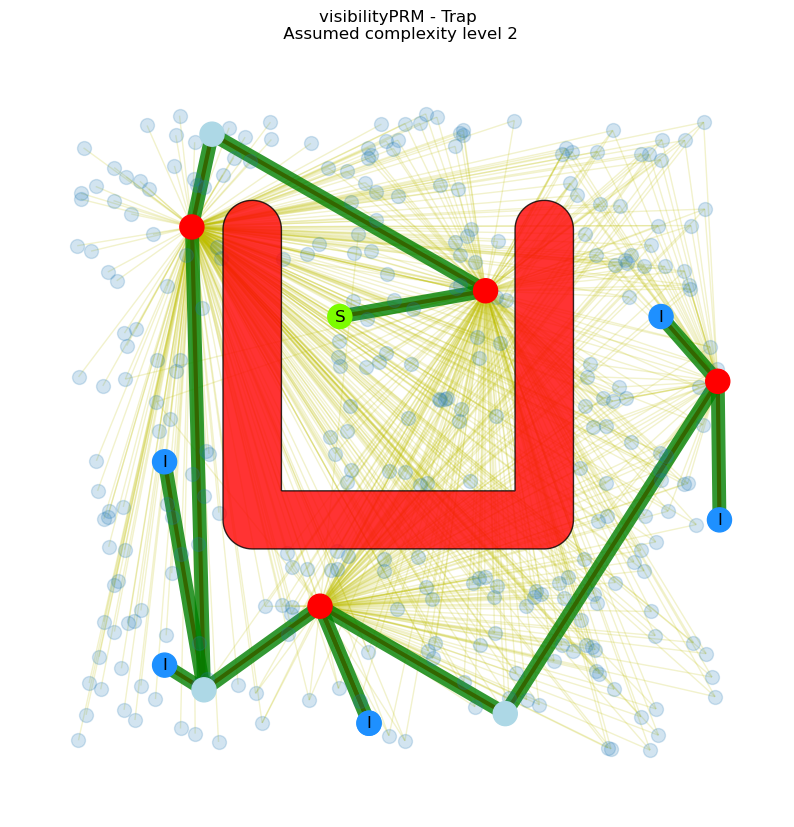

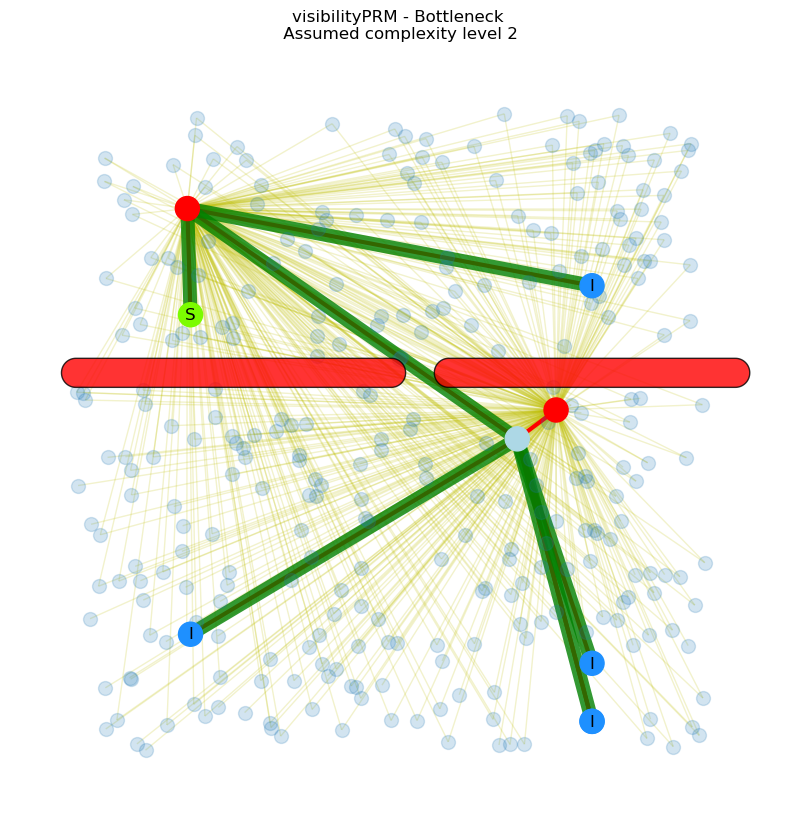

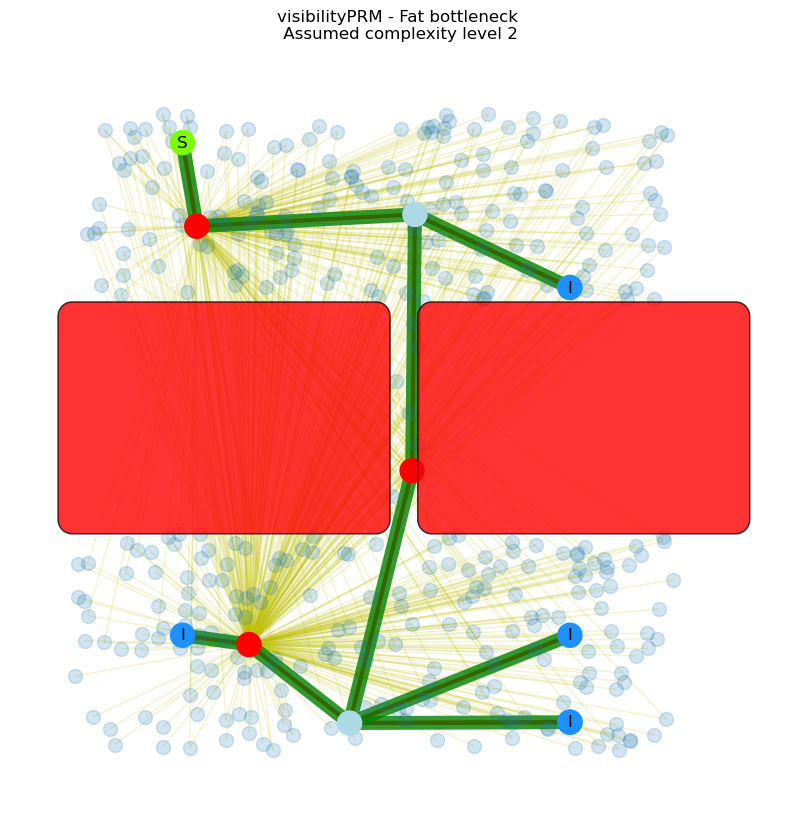

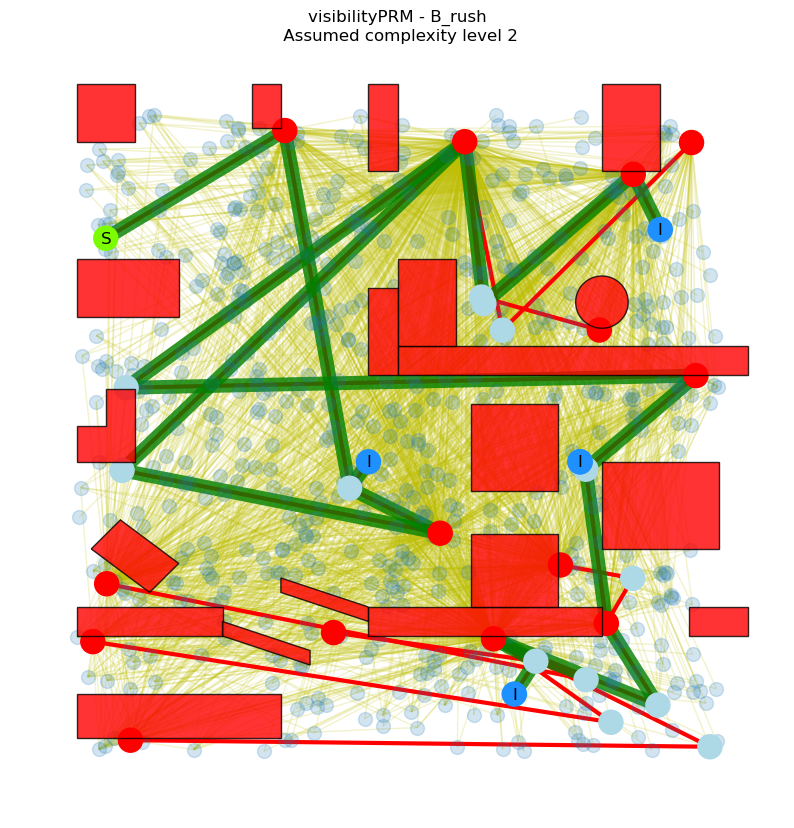

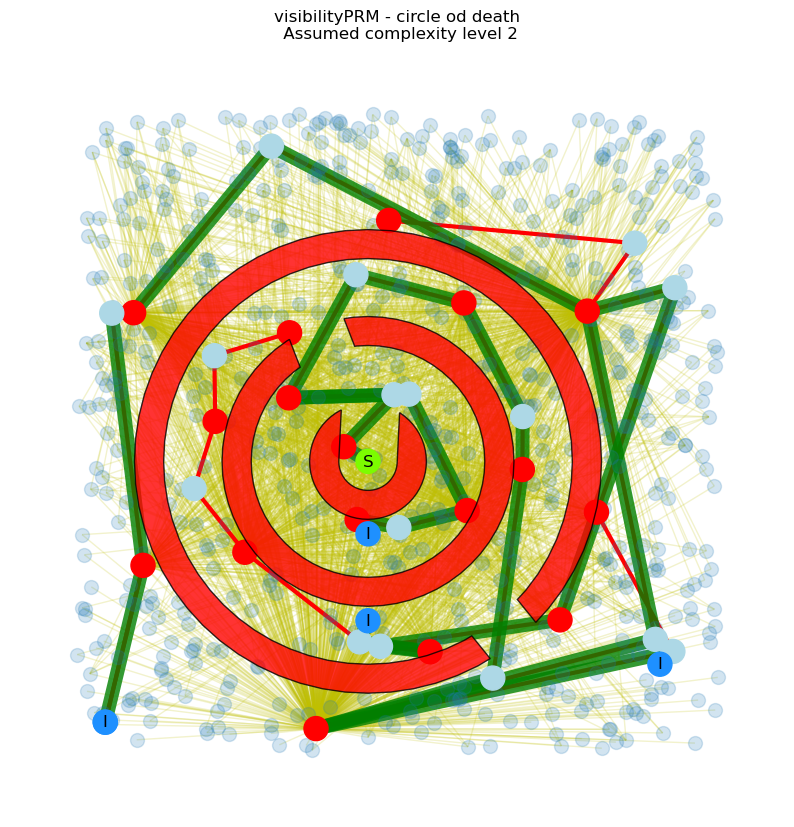

In [9]:
import matplotlib.pyplot as plt

for result in resultList:
    print(result)
    fig_local = plt.figure(figsize=(10,10))
    ax = fig_local.add_subplot(1,1,1)
    title = result.plannerFactoryName + " - " + result.benchmark.name
    if result.solution == []:
        title += " (No path found!)"
    title += "\n Assumed complexity level " + str(result.benchmark.level)
    ax.set_title(title)

    ax.grid(True)

    try:
        #IPVISBasicsPRM.basicPRMVisualize(result.planner, result.solution, ax=ax, nodeSize=100))
        plannerFactory[result.plannerFactoryName][2](result.planner, result.solution, ax=ax, nodeSize=100)
        print("")
        print("Planner: "+ str(result.planner))
        print("Solution" + str(result.solution))

    except Exception as e:
        print ("Error")
        print(e)
        pass
    

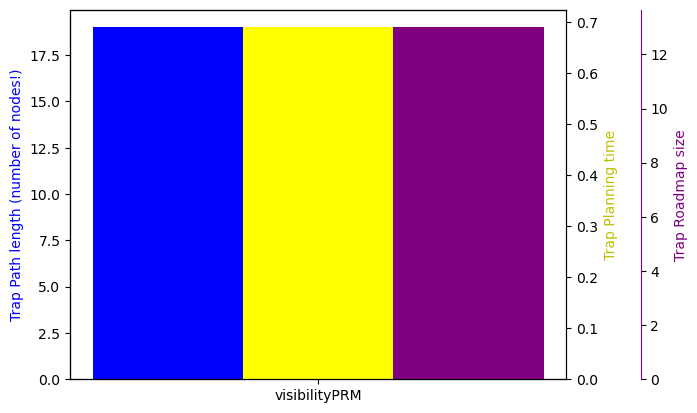

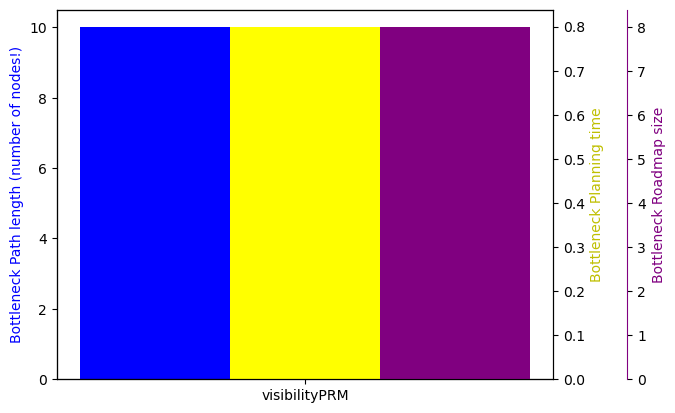

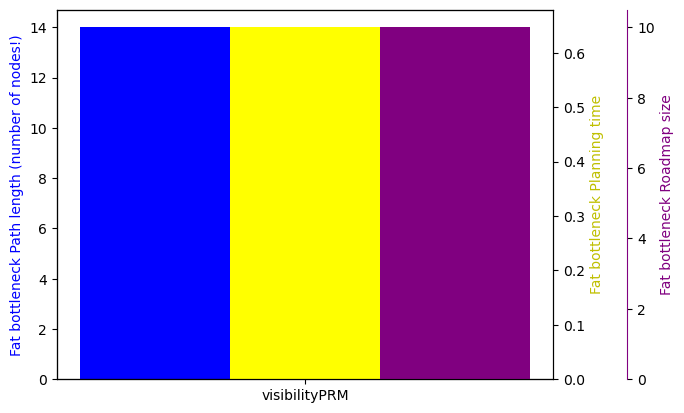

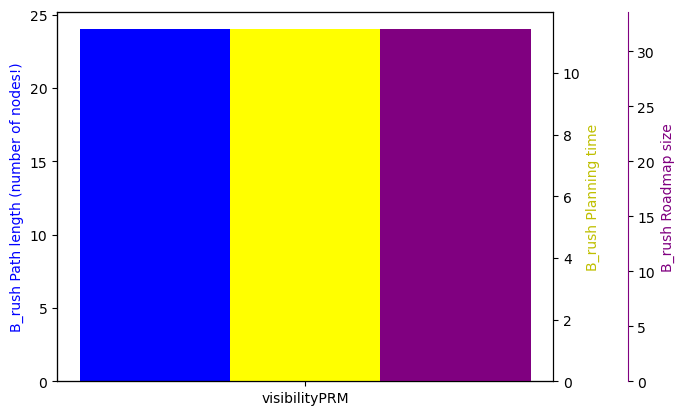

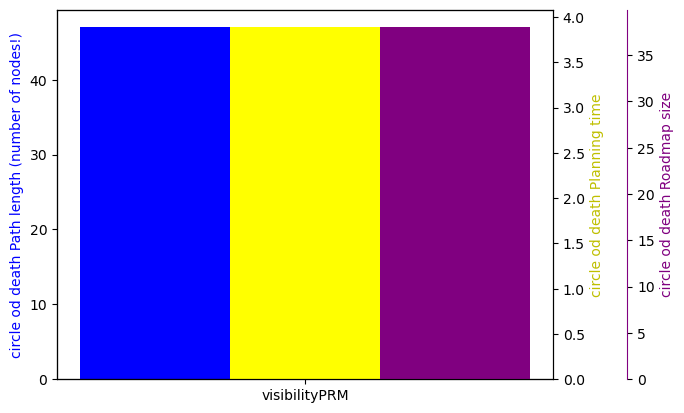

In [10]:
import numpy as np
for bench in testList:
    title = bench.name
    pathLength = dict()
    planningTime = dict()
    roadmapSize  = dict()
    
    try:
        for result in resultList:
            if result.benchmark.name == bench.name:
                #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
                pathLength[result.plannerFactoryName] = len(result.solution)
                planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)["time"]["planRoundPath"]
                roadmapSize[result.plannerFactoryName] = result.planner.graph.size()


        fig, ax = plt.subplots()

        width = 0.2

        ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width, color="blue")
        ax.set_ylabel(title + " Path length (number of nodes!)", color="blue")
        ax.set_xticks(np.arange(len(pathLength.keys())) + width)
        ax.set_xticklabels(pathLength.keys())

        ax2 = ax.twinx()
        bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
        ax2.set_ylabel(title + " Planning time", color="y")

        # Add coloring and patterns on axis two
        hatches = ['x' if length==0 else '' for length in pathLength.values()]
        color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
        for i,thisbar in enumerate(bar.patches):
            thisbar.set_facecolor(color[i])
            thisbar.set_hatch(hatches[i])

        # Multiple axes 
        ax3 = ax.twinx()
        ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
        ax3.set_ylabel(title + " Roadmap size",  color="purple")
        ax3.spines['right'].set_position(('axes', 1.15))
        ax3.spines['right'].set_color("purple")
    except:
        pass


    
        
    

result.perfDataFrame.groupby(["name"]).sum()

In [11]:
result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)

time
name                            
_getRandomFreePosition  0.050255
_learnRoadmap           3.705134
_nearestInterim         0.010696
lineInCollision         3.626662
planRoundPath           3.886553
pointInCollision        3.205246

In [12]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"]

name                                               args kwargs  \
696  planRoundPath  (<IPVisibilityPRM_Roundtrip.VisPRM object at 0...     {}   

                                                retVal      time  
696  [start, 222, 223, 13, 203, 7, 325, 321, interi...  3.886553

In [13]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)

/tmp/ipykernel_5254/2940436852.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)


0.0